<a href="https://colab.research.google.com/github/gibranfp/CursoAprendizajeAutomatizado/blob/master/notebooks/7a_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducción de dimensiones mediante análisis de componentes principales (ACP)
En esta libreta exploraremos la reducción de dimensiones con análisis de componentes principales (ACP). 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

Dado un conjunto de ejemplos $\mathbf{X} = \{\mathbf{x}^{(i)} \in \mathbb{R}^d\mid i = 1, \ldots, n\}$, el análisis de componentes principales busca encontrar los vectores $\mathbf{u}_1, \ldots, \mathbf{u}_K$, donde K es usualmente mucho menor a $d$ que maximicen la varianza. 

Esto puede lograrse obteniendo los $m$ eigenvectores con mayor eigenvalor $\lambda_1, \ldots, \lambda_m$ de la matriz de covarianza $\boldsymbol{\Sigma}$, definida por

$
\boldsymbol{\Sigma} = \frac{1}{n - 1}\sum_{i=1}^n
(\mathbf{x}^{(i)} - \boldsymbol{\mu}) (\mathbf{x}^{(i)} - \boldsymbol{\mu})^\top
$

Los $m$ eigenvectores se conocen como componentes principales.

In [0]:
class PCA:
  def __init__(self, n_components):
    self.n_components_ = n_components

  def fit(self, X):
    self.means_ = np.mean(X, axis=0)
    devs = X - self.means_
      
    cov = np.dot(devs.T, devs) / (X.shape[0] - 1)
    w, v = np.linalg.eig(cov)

    self.components_ = v[:, 0:self.n_components_]
    self.vars_ = w[0:self.n_components_]

  def transform(self, X):
    return np.dot(X - self.means_, self.components_)

## Conjunto de datos de Iris
Apliquemos el PCA que acabamos de programar en conjunto de datos de flores iris. Elegimos los atributos de ancho y largo sepal y visualizamos el conjunto.

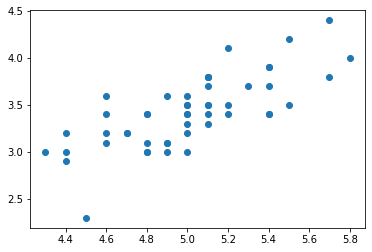

In [3]:
iris = datasets.load_iris()
p2d = iris['data'][:,:2]
p2d = p2d[iris['target']==0]
plt.plot(p2d[:, 0], p2d[:, 1], 'o')
plt.show()

Encontramos sus 2 componentes principales

In [0]:
pca2d = PCA(2)
pca2d.fit(p2d)

Visualizamos los componentes principales encontrados

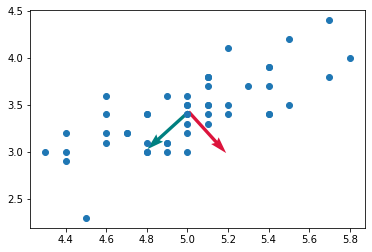

In [5]:
plt.plot(p2d[:, 0], p2d[:, 1], 'o')
colors = ['teal', 'crimson']
for c,u in zip(colors, pca2d.components_):
   plt.quiver(pca2d.means_[0], pca2d.means_[1], u[0], u[1], width=0.01, 
              scale=6,
              color=c)
plt.show()

In [6]:
print(pca2d.components_)
print(pca2d.vars_)

[[-0.74077832 -0.67174957]
 [ 0.67174957 -0.74077832]]
[0.03427804 0.23366074]


Reducimos dimensiones del conjunto de ejemplos de 3 (ancho y largo del sépalo y ancho del pétalo). 

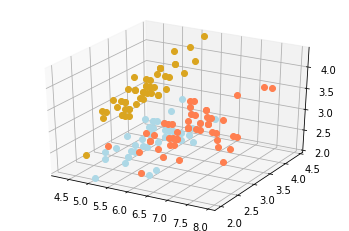

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

iris = datasets.load_iris()
p3d = iris['data'][:, :3]

colores=['goldenrod', 'lightblue', 'coral']
for i,c in enumerate(colores):
  plt.plot(p3d[iris['target']==i,0], p3d[iris['target']==i, 1], p3d[iris['target']==i, 1], 'o', color=c)

Aplicamos PCA y proyectamos los ejemplos al subespacio de 2 dimensiones

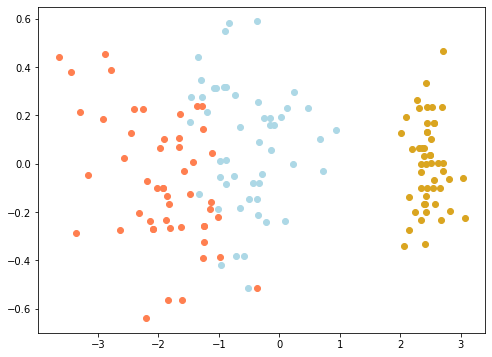

In [8]:
pca = PCA(2)
pca.fit(p3d)
proj_mipca = pca.transform(p3d)

fig = plt.figure(1, figsize=(8, 6))
for i,c in enumerate(colores):
  plt.plot(proj_mipca[np.where(iris['target']==i), 0],
           proj_mipca[np.where(iris['target']==i), 1], 'o', color=c)
plt.show()

Comparamos los resultados con scikit-learn

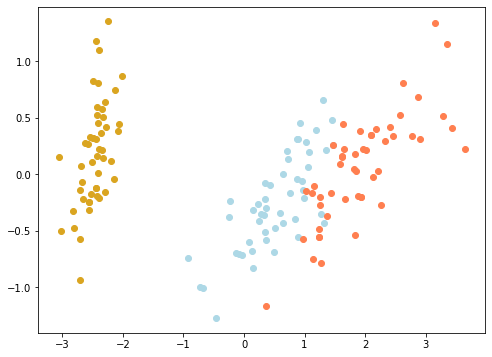

In [9]:
from sklearn.decomposition import PCA as SKPCA

skpca = SKPCA(n_components=2)
skpca.fit(p3d)
skproj =  skpca.transform(p3d)

fig = plt.figure(1, figsize=(8, 6))
for i,c in enumerate(colores):
  plt.plot(skproj[np.where(iris['target']==i), 0],
           skproj[np.where(iris['target']==i), 1],
           'o', color=c)
plt.show()